# Association Rules of QUality Milk Dataset

Created by : Ghazali Akmal Rabbani

Dedicated to : Wandry Parlindungan

Digital Business Experience

BLEMBA 68 Weekdays

MBA ITB Bandung

In [2]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
df = pd.read_csv('milknew.csv')
# Convert features to categorical for Apriori
df_cat = df.astype('category')
# Create a DataFrame with binary values indicating the presence of features
df_bin = pd.get_dummies(df_cat)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
# Apply Apriori algorithm
frequent_itemsets = apriori(df_bin, min_support=0.01, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=1)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [5]:
rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pH_3.0),(Temprature_40),0.066100,0.124646,0.066100,1.0,8.022727,0.057861,inf,0.937310
1,(pH_3.0),(Taste_1),0.066100,0.546742,0.066100,1.0,1.829016,0.029960,inf,0.485339
2,(pH_3.0),(Colour_255),0.066100,0.593012,0.066100,1.0,1.686306,0.026902,inf,0.435794
3,(pH_3.0),(Grade_low),0.066100,0.405099,0.066100,1.0,2.468531,0.039323,inf,0.637007
4,(Temprature_60),(pH_4.5),0.016997,0.034939,0.016997,1.0,28.621622,0.016403,inf,0.981748
...,...,...,...,...,...,...,...,...,...,...
67016,"(pH_9.5, Turbidity_1)","(Odor_1, Temprature_34, Fat _0, Colour_255, Ta...",0.022663,0.022663,0.022663,1.0,44.125000,0.022149,inf,1.000000
67017,"(pH_9.5, Colour_255)","(Odor_1, Temprature_34, Fat _0, Turbidity_1, T...",0.022663,0.022663,0.022663,1.0,44.125000,0.022149,inf,1.000000
67018,"(pH_9.5, Taste_1)","(Odor_1, Temprature_34, Fat _0, Turbidity_1, C...",0.022663,0.022663,0.022663,1.0,44.125000,0.022149,inf,1.000000
67019,"(pH_9.5, Grade_low)","(Odor_1, Temprature_34, Fat _0, Turbidity_1, C...",0.022663,0.022663,0.022663,1.0,44.125000,0.022149,inf,1.000000


In [6]:
filtered_rules = rules[
    rules['consequents'].apply(lambda x: all(item in ['Grade_high', 'Grade_medium', 'Grade_low'] for item in x))
].reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
filtered_rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(pH_3.0),(Grade_low),0.066100,0.405099,0.066100,1.0,2.468531,0.039323,inf,0.637007
1,"(Odor_0, Fat _1, Temprature_36, Colour_255, pH...",(Grade_medium),0.025496,0.353163,0.025496,1.0,2.831551,0.016492,inf,0.663760
2,"(Taste_0, Temprature_36, Fat _0, pH_6.5, Turbi...",(Grade_medium),0.016053,0.353163,0.016053,1.0,2.831551,0.010384,inf,0.657390
3,"(Taste_0, Temprature_36, Fat _0, Colour_247, p...",(Grade_medium),0.016053,0.353163,0.016053,1.0,2.831551,0.010384,inf,0.657390
4,"(Taste_0, Fat _1, Temprature_36, Colour_255, p...",(Grade_medium),0.025496,0.353163,0.025496,1.0,2.831551,0.016492,inf,0.663760
...,...,...,...,...,...,...,...,...,...,...
2723,"(Colour_255, Odor_1, pH_5.6, Turbidity_1)",(Grade_low),0.017941,0.405099,0.017941,1.0,2.468531,0.010673,inf,0.605769
2724,"(Colour_255, pH_5.6, Fat _1, Turbidity_1)",(Grade_low),0.017941,0.405099,0.017941,1.0,2.468531,0.010673,inf,0.605769
2725,"(Temprature_35, Odor_0, Taste_1, pH_6.5)",(Grade_medium),0.012276,0.353163,0.012276,1.0,2.831551,0.007940,inf,0.654876
2726,"(Temprature_35, Fat _1, Taste_1, pH_6.5)",(Grade_medium),0.012276,0.353163,0.012276,1.0,2.831551,0.007940,inf,0.654876


In [8]:
# Convert frozenset to string
filtered_rules['antecedents'] = filtered_rules['antecedents'].apply(lambda x: ', '.join(x))
filtered_rules['consequents'] = filtered_rules['consequents'].apply(lambda x: ', '.join(x))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
filtered_rules['feature_names'] = filtered_rules['antecedents'].apply(lambda x: [item.split('_')[0].strip() for item in x.split(',')])
filtered_rules['feature_names'] = filtered_rules['feature_names'].apply(lambda x: ', '.join(x))
all_filtered_rules = filtered_rules.sort_values(by='confidence', ascending=False).reset_index(drop=True)
filtered_rules = filtered_rules[filtered_rules['confidence']>=1.0].sort_values(by='confidence', ascending=False).reset_index(drop=True)
filtered_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric,feature_names
0,pH_3.0,Grade_low,0.066100,0.405099,0.066100,1.0,2.468531,0.039323,inf,0.637007,pH
1,"Odor_0, Fat _1, Temprature_36, Colour_255, pH_6.5",Grade_medium,0.025496,0.353163,0.025496,1.0,2.831551,0.016492,inf,0.663760,"Odor, Fat, Temprature, Colour, pH"
2,"Taste_0, Temprature_36, Fat _0, pH_6.5, Turbid...",Grade_medium,0.016053,0.353163,0.016053,1.0,2.831551,0.010384,inf,0.657390,"Taste, Temprature, Fat, pH, Turbidity"
3,"Taste_0, Temprature_36, Fat _0, Colour_247, pH...",Grade_medium,0.016053,0.353163,0.016053,1.0,2.831551,0.010384,inf,0.657390,"Taste, Temprature, Fat, Colour, pH"
4,"Taste_0, Fat _1, Temprature_36, Colour_255, pH...",Grade_medium,0.025496,0.353163,0.025496,1.0,2.831551,0.016492,inf,0.663760,"Taste, Fat, Temprature, Colour, pH"
...,...,...,...,...,...,...,...,...,...,...,...
2723,"Colour_255, Odor_1, pH_5.6, Turbidity_1",Grade_low,0.017941,0.405099,0.017941,1.0,2.468531,0.010673,inf,0.605769,"Colour, Odor, pH, Turbidity"
2724,"Colour_255, pH_5.6, Fat _1, Turbidity_1",Grade_low,0.017941,0.405099,0.017941,1.0,2.468531,0.010673,inf,0.605769,"Colour, pH, Fat, Turbidity"
2725,"Temprature_35, Odor_0, Taste_1, pH_6.5",Grade_medium,0.012276,0.353163,0.012276,1.0,2.831551,0.007940,inf,0.654876,"Temprature, Odor, Taste, pH"
2726,"Temprature_35, Fat _1, Taste_1, pH_6.5",Grade_medium,0.012276,0.353163,0.012276,1.0,2.831551,0.007940,inf,0.654876,"Temprature, Fat, Taste, pH"


In [10]:
df_gradelow = filtered_rules[filtered_rules['consequents']=='Grade_low'].sort_values(by='confidence').reset_index(drop=True)
df_grademedium = filtered_rules[filtered_rules['consequents']=='Grade_medium'].sort_values(by='confidence').reset_index(drop=True)
df_gradehigh = filtered_rules[filtered_rules['consequents']=='Grade_high'].sort_values(by='confidence').reset_index(drop=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


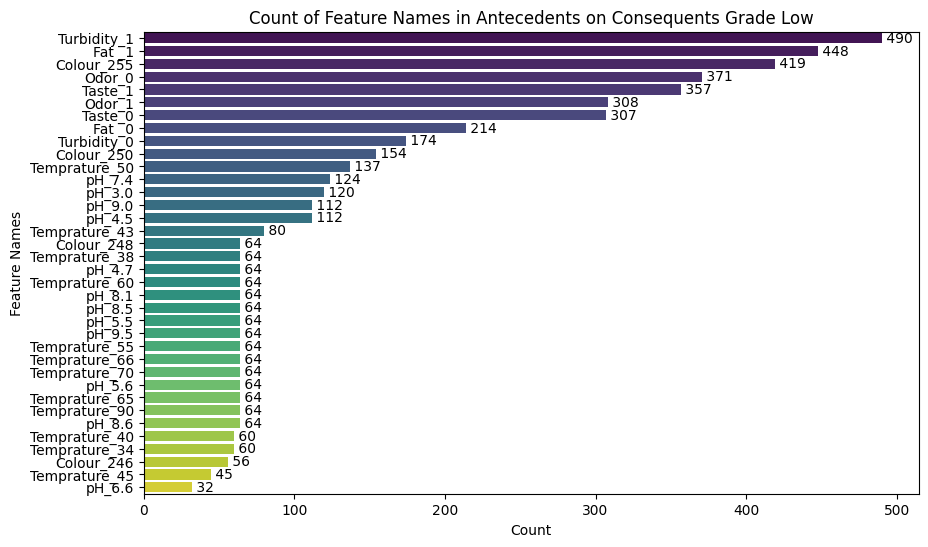

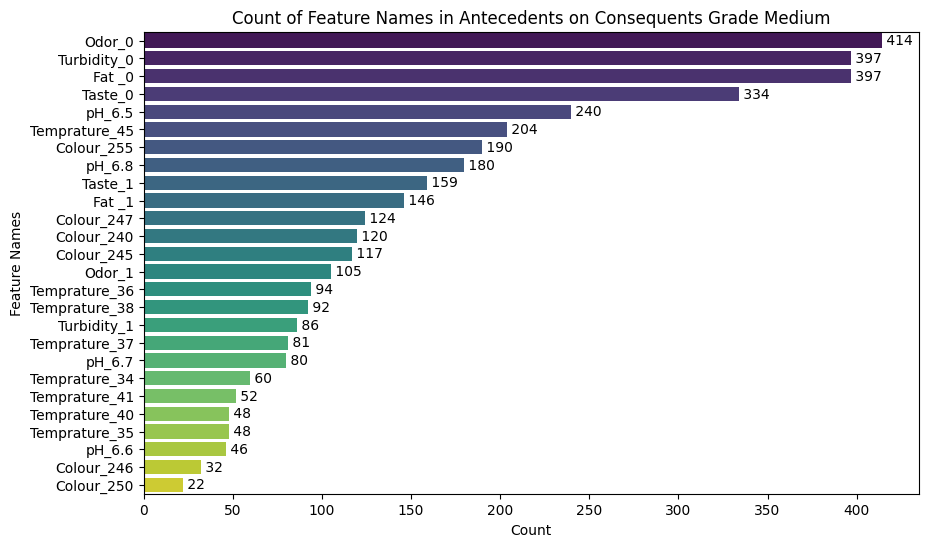

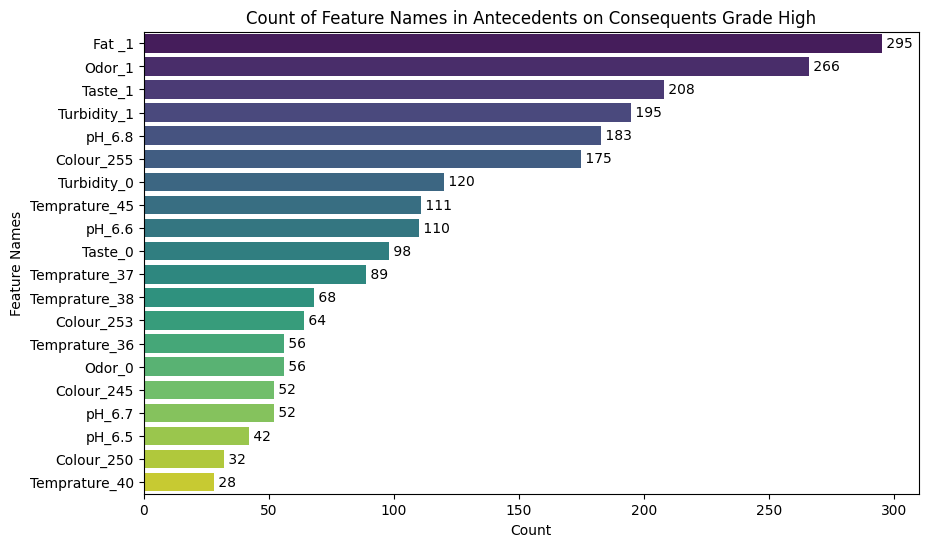

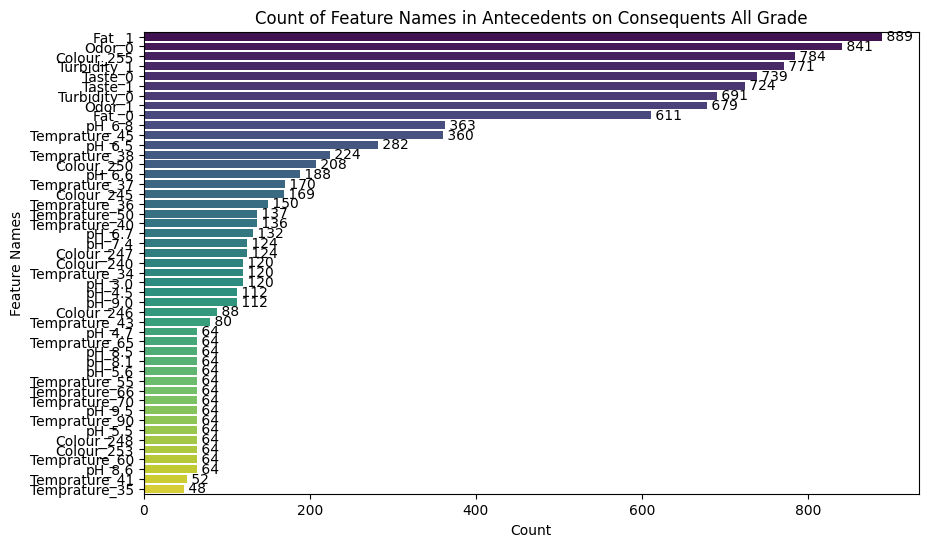

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

def visualize_count_feature(df, name):
  feature_names = [feature.strip() for sublist in df['antecedents'].str.split(',') for feature in sublist]

  # Count occurrences of each feature
  feature_counts = pd.Series(feature_names).value_counts()

  # Create a bar chart
  plt.figure(figsize=(10, 6))
  sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')

  # Add labels and title
  plt.xlabel('Count')
  plt.ylabel('Feature Names')
  plt.title(f'Count of Feature Names in Antecedents on Consequents {name}')

  # Display the count values on the bars
  for i, value in enumerate(feature_counts.values):
      plt.text(value, i, f' {value}', va='center', fontsize=10)

  plt.show()

visualize_count_feature(df_gradelow, 'Grade Low')
visualize_count_feature(df_grademedium, 'Grade Medium')
visualize_count_feature(df_gradehigh, 'Grade High')
visualize_count_feature(filtered_rules, 'All Grade')

In [14]:
feature_data = filtered_rules[['feature_names']]
feature_data['feature_names'] = feature_data['feature_names'].apply(lambda x: [item.strip() for item in x.split(',')])
feature_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-14-19120721c731>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  feature_data['feature_names'] = feature_data['feature_names'].apply(lambda x: [item.strip() for item in x.split(',')])


,feature_names
0,[pH]
1,"[Odor, Fat, Temprature, Colour, pH]"
2,"[Taste, Temprature, Fat, pH, Turbidity]"
3,"[Taste, Temprature, Fat, Colour, pH]"
4,"[Taste, Fat, Temprature, Colour, pH]"
...,...
2723,"[Colour, Odor, pH, Turbidity]"
2724,"[Colour, pH, Fat, Turbidity]"
2725,"[Temprature, Odor, Taste, pH]"
2726,"[Temprature, Fat, Taste, pH]"


In [15]:
# Flatten the list of feature names
feature_list = [feature for sublist in feature_data['feature_names'] for feature in sublist]

# Count occurrences of each feature
feature_counts = pd.Series(feature_list).value_counts()
feature_counts

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


pH            1881
Temprature    1861
Colour        1621
Odor          1520
Fat           1500
Taste         1463
Turbidity     1462
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


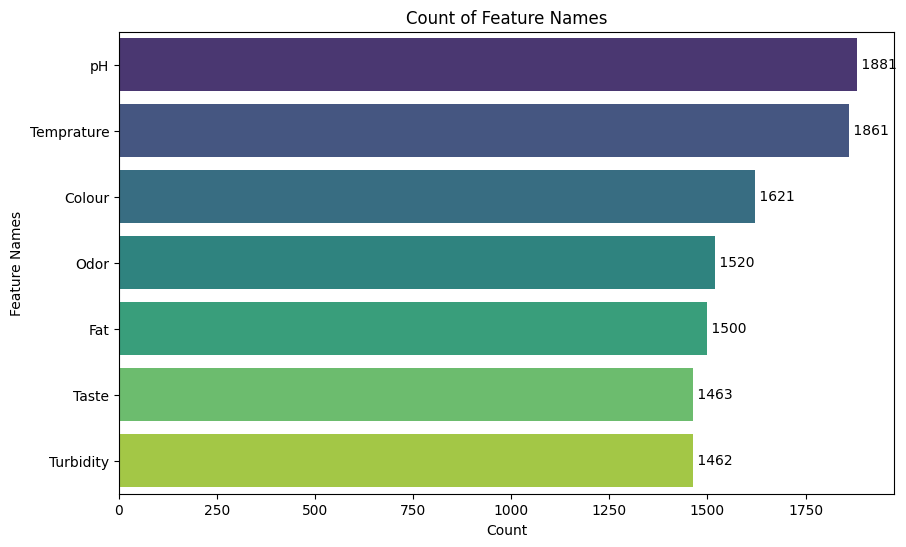

In [16]:
# Count occurrences of each feature
feature_counts = pd.Series(feature_list).value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_counts.values, y=feature_counts.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Feature Names')
plt.title('Count of Feature Names')

# Display the count values on the bars
for i, value in enumerate(feature_counts.values):
    plt.text(value, i, f' {value}', va='center', fontsize=10)

plt.show()

In [17]:
consequents_data = filtered_rules['consequents'].value_counts()
consequents_data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Grade_low       1306
Grade_medium     903
Grade_high       519
Name: consequents, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


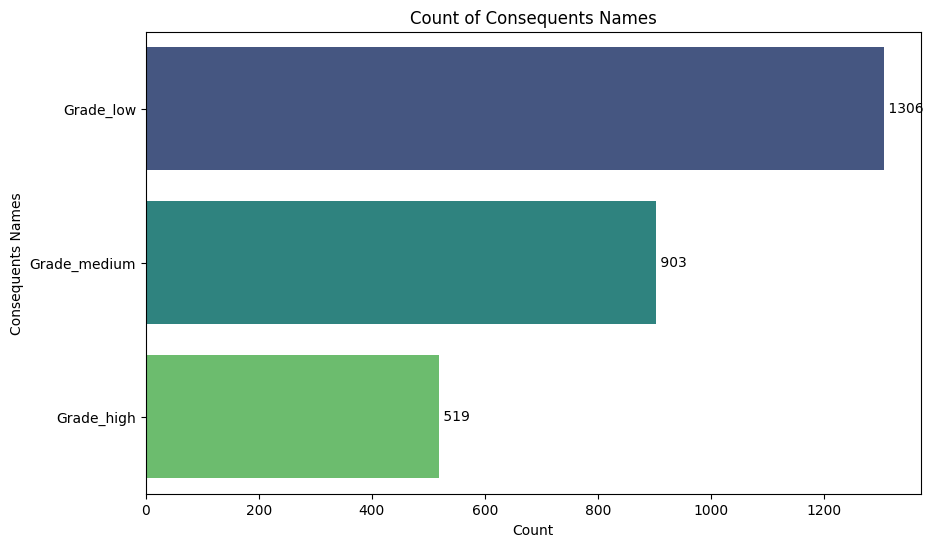

In [18]:
# Create a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=consequents_data.values, y=consequents_data.index, palette='viridis')

# Add labels and title
plt.xlabel('Count')
plt.ylabel('Consequents Names')
plt.title('Count of Consequents Names')

# Display the count values on the bars
for i, value in enumerate(consequents_data.values):
    plt.text(value, i, f' {value}', va='center', fontsize=10)

plt.show()